In [1]:
import geopandas
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick
import datadotworld as dw

In [2]:
def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
    map_data = geopandas.read_file(filename = filename,
                                  index_col = index_col)
    map_data.rename(columns={"State":"state"}, inplace = True)
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) +\
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    map_data.set_index(FIPS_name, inplace = True)
    return map_data

In [3]:
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 
    'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({'font.size': 32})

In [4]:
fips_name = "fips_code"
map_data = import_geo_data(
    filename = "countiesWithStatesAndPopulation.shp",
    index_col = "Date", FIPS_name = fips_name)

In [5]:
map_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID       NAME LSAD  \
fips_code                                                               
21007           21      007  00516850  0500000US21007    Ballard   06   
21017           21      017  00516855  0500000US21017    Bourbon   06   
21031           21      031  00516862  0500000US21031     Butler   06   
21065           21      065  00516879  0500000US21065     Estill   06   
21069           21      069  00516881  0500000US21069    Fleming   06   
...            ...      ...       ...             ...        ...  ...   
31073           31      073  00835858  0500000US31073     Gosper   06   
39075           39      075  01074050  0500000US39075     Holmes   06   
48171           48      171  01383871  0500000US48171  Gillespie   06   
55079           55      079  01581100  0500000US55079  Milwaukee   06   
26139           26      139  01623012  0500000US26139     Ottawa   06   

                ALAND      AWATER  Population      state  \
fips_code                                                  
21007       639387454    69473325      7888.0   Kentucky   
21017       750439351     4829777     19788.0   Kentucky   
21031      1103571974    13943044     12879.0   Kentucky   
21065       655509930     6516335     14106.0   Kentucky   
21069       902727151     7182793     14581.0   Kentucky   
...               ...         ...         ...        ...   
31073      1186616237    11831826      1990.0   Nebraska   
39075      1094405866     3695230     43960.0       Ohio   
48171      2740719114     9012764     26988.0      Texas   
55079       625440563  2455383635    945726.0  Wisconsin   
26139      1459502408  2765830983    291830.0   Michigan   

                                                    geometry  
fips_code                                                     
21007      POLYGON ((-89.18137 37.04630, -89.17938 37.053...  
21017      POLYGON ((-84.44266 38.28324, -84.44114 38.283...  
21031      POLYGON ((-86.94486 37.07341, -86.94346 37.074...  
21065      POLYGON ((-84.12662 37.64540, -84.12483 37.646...  
21069      POLYGON ((-83.98428 38.44549, -83.98246 38.450...  
...                                                      ...  
31073      POLYGON ((-100.09510 40.43866, -100.08937 40.4...  
39075      POLYGON ((-82.22066 40.66758, -82.19327 40.667...  
48171      POLYGON ((-99.30400 30.49983, -99.28234 30.499...  
55079      POLYGON ((-88.06959 42.86726, -88.06959 42.872...  
26139      POLYGON ((-86.26432 43.11830, -86.25103 43.118...  

[3142 rows x 11 columns]

Text(0.5, 1.0, 'Minnesota')

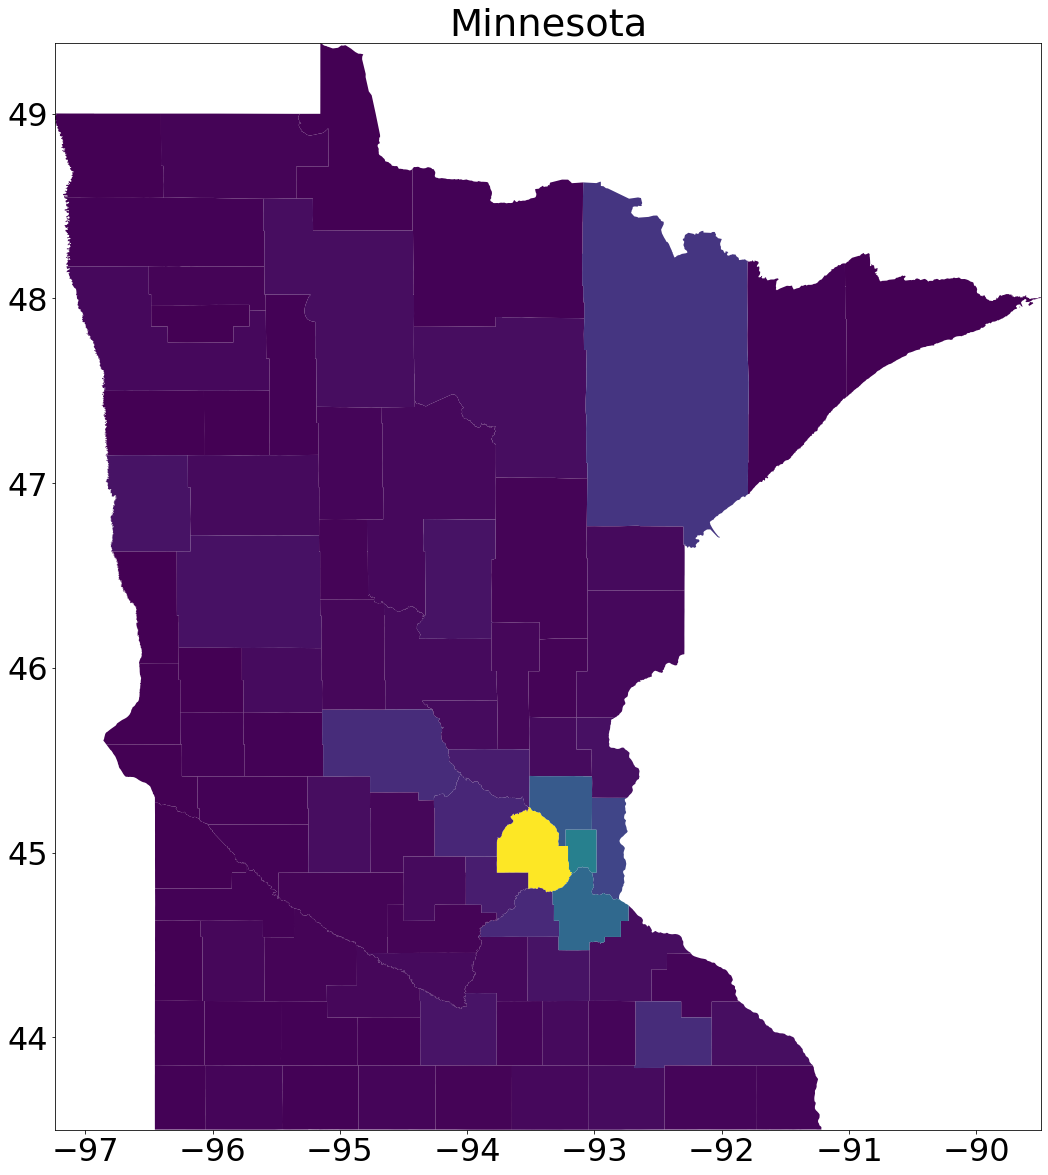

In [6]:
fig, ax = plt.subplots(figsize = (30,20))
map_data[map_data["state"] == "Minnesota"].plot(column = "Population", ax = ax)
ax.set_title("Minnesota")

<AxesSubplot:>

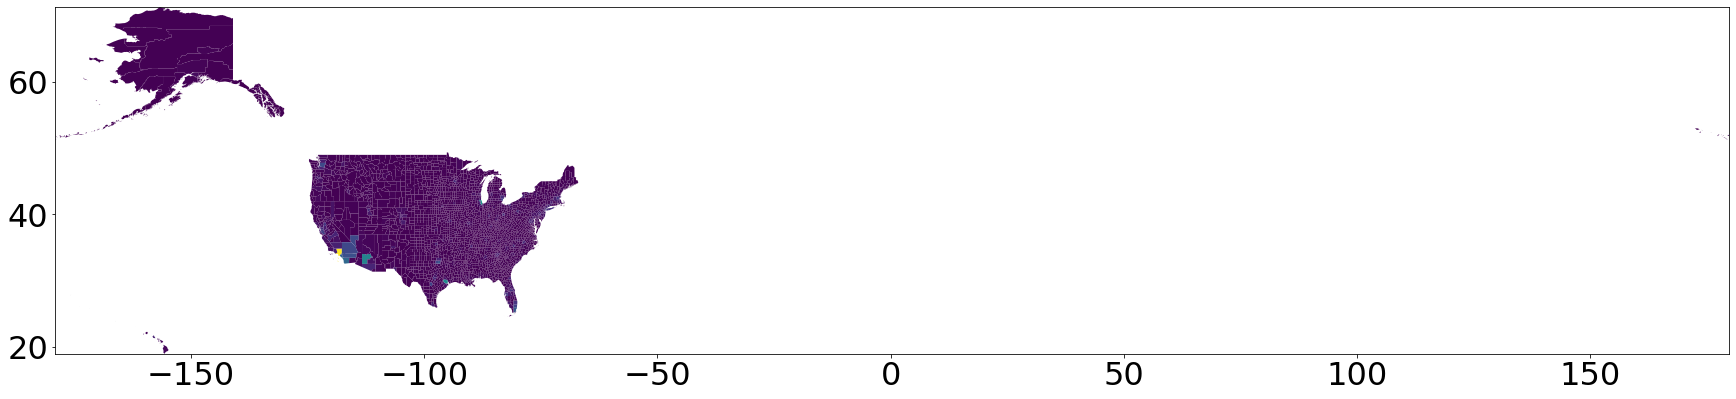

In [7]:
fig, ax = plt.subplots(figsize = (30, 20))
map_data.plot(column = "Population", ax = ax)

In [8]:
def import_covid_data(FIPS_name):
    dataset = dw.load_dataset("associatedpress/johns-hopkins-coronavirus-case-tracker",
                              auto_update = True)
    covid_data = dataset.dataframes["2_cases_and_deaths_by_county_timeseries"]
    covid_data = covid_data[covid_data[FIPS_name] < 57000]
    covid_data = covid_data[covid_data[FIPS_name] > 0]
    
    #convert format to integers
    covid_data[FIPS_name] = covid_data[FIPS_name].astype(int)
    #format the dates to datetime
    covid_data['date'] = pd.to_datetime(covid_data['date'])
    covid_data.set_index([FIPS_name, "date"], inplace = True)
    
    #creating abbreviation for state variable
    covid_data["state_abr"] = ""
    for state, abr in state_dict.items():
        covid_data.loc[covid_data["state"] == state, "state_abr"] = abr
        
    # Create "Location" which concatenates county name and state abbreviation 
    covid_data["Location"] = covid_data["location_name"] + ", " + \
        covid_data["state_abr"]

    return covid_data

In [9]:
covid_data = import_covid_data(FIPS_name = fips_name)

/Users/kodjobarnor/opt/anaconda3/lib/python3.8/site-packages/datadotworld/models/dataset.py:206: UserWarning: Unable to set data frame dtypes automatically using 2_cases_and_deaths_by_county_timeseries schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 2
  warnings.warn(


In [10]:
covid_data

uid location_type location_name    state  \
fips_code date                                                        
1001      2020-01-22  84001001        county       Autauga  Alabama   
          2020-01-23  84001001        county       Autauga  Alabama   
          2020-01-24  84001001        county       Autauga  Alabama   
          2020-01-25  84001001        county       Autauga  Alabama   
          2020-01-26  84001001        county       Autauga  Alabama   
...                        ...           ...           ...      ...   
56045     2021-11-18  84056045        county        Weston  Wyoming   
          2021-11-19  84056045        county        Weston  Wyoming   
          2021-11-20  84056045        county        Weston  Wyoming   
          2021-11-21  84056045        county        Weston  Wyoming   
          2021-11-22  84056045        county        Weston  Wyoming   

                      total_population  cumulative_cases  \
fips_code date                                             
1001      2020-01-22           55200.0                 0   
          2020-01-23           55200.0                 0   
          2020-01-24           55200.0                 0   
          2020-01-25           55200.0                 0   
          2020-01-26           55200.0                 0   
...                                ...               ...   
56045     2021-11-18            7100.0              1186   
          2021-11-19            7100.0              1187   
          2021-11-20            7100.0              1187   
          2021-11-21            7100.0              1187   
          2021-11-22            7100.0              1188   

                      cumulative_cases_per_100_000  cumulative_deaths  \
fips_code date                                                          
1001      2020-01-22                          0.00                  0   
          2020-01-23                          0.00                  0   
          2020-01-24                          0.00                  0   
          2020-01-25                          0.00                  0   
          2020-01-26                          0.00                  0   
...                                            ...                ...   
56045     2021-11-18                      16704.23                 13   
          2021-11-19                      16718.31                 13   
          2021-11-20                      16718.31                 13   
          2021-11-21                      16718.31                 13   
          2021-11-22                      16732.39                 13   

                      cumulative_deaths_per_100_000  new_cases  new_deaths  \
fips_code date                                                               
1001      2020-01-22                            0.0        NaN         NaN   
          2020-01-23                            0.0        0.0         0.0   
          2020-01-24                            0.0        0.0         0.0   
          2020-01-25                            0.0        0.0         0.0   
          2020-01-26                            0.0        0.0         0.0   
...                                             ...        ...         ...   
56045     2021-11-18                          183.1        1.0         0.0   
          2021-11-19                          183.1        1.0         0.0   
          2021-11-20                          183.1        0.0         0.0   
          2021-11-21                          183.1        0.0         0.0   
          2021-11-22                          183.1        1.0         0.0   

                      new_cases_per_100_000  new_deaths_per_100_000  \
fips_code date                                                        
1001      2020-01-22                    NaN                     NaN   
          2020-01-23                   0.00                     0.0   
          2020-01-24                   0.00                     0.0   
  

In [11]:
covid_data[covid_data["state"] == "North Dakota"].groupby("date").sum()[["new_cases", "new_deaths"]]

new_cases  new_deaths
date                             
2020-01-22        0.0         0.0
2020-01-23        0.0         0.0
2020-01-24        0.0         0.0
2020-01-25        0.0         0.0
2020-01-26        0.0         0.0
...               ...         ...
2021-11-18      641.0         7.0
2021-11-19      470.0        12.0
2021-11-20      487.0         2.0
2021-11-21      148.0         0.0
2021-11-22      221.0         0.0

[671 rows x 2 columns]

Text(0.5, 1.0, 'United States')

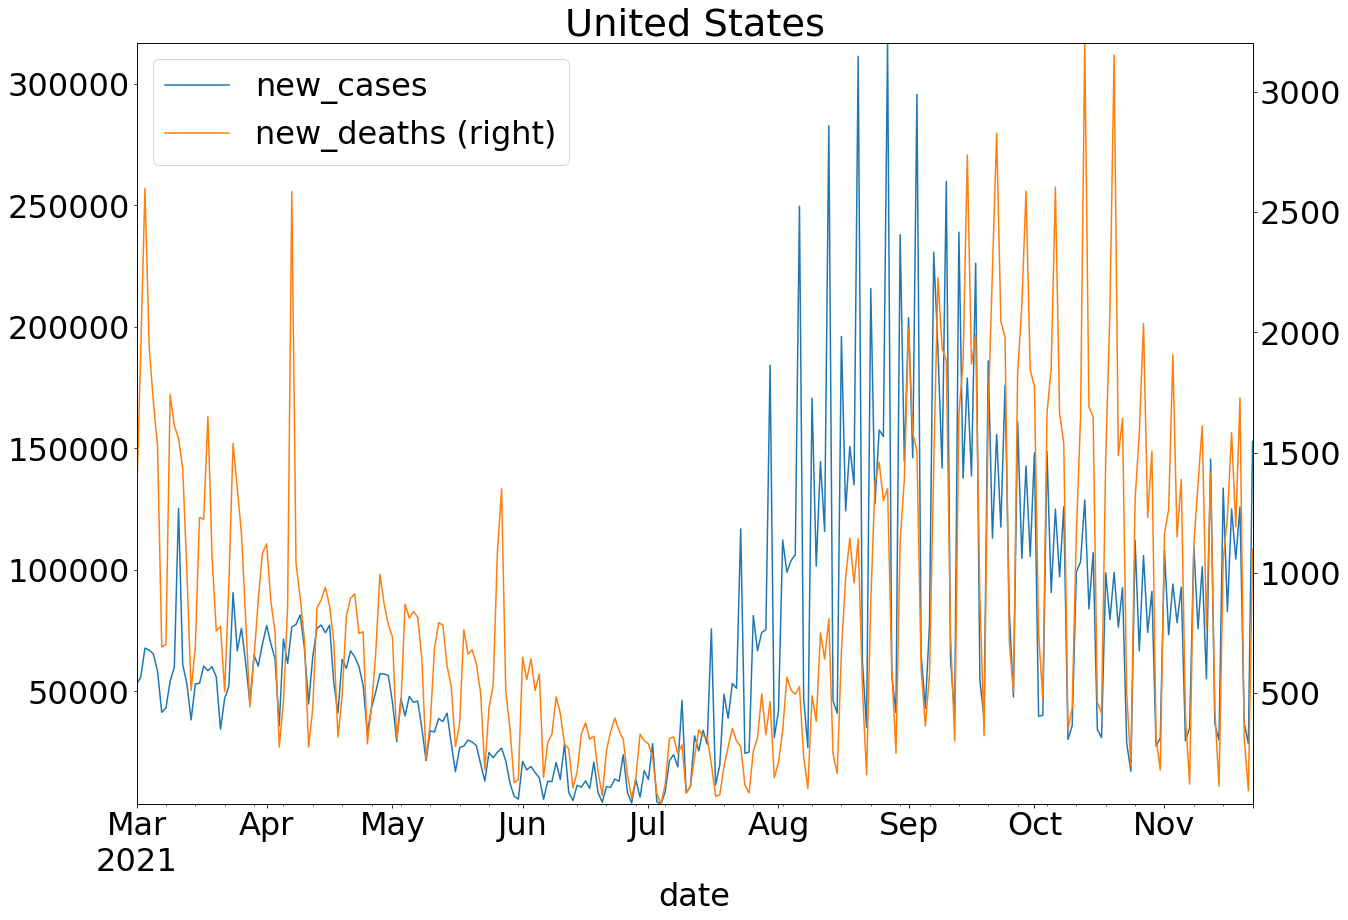

In [12]:
fig,ax = plt.subplots(figsize = (20,14))
covid_data.groupby("date").sum().loc["2021-03-01":,["new_cases", "new_deaths"]].plot.line(
    secondary_y = "new_deaths", ax = ax)
ax.set_title("United States")

Text(0.5, 1.0, 'United States')

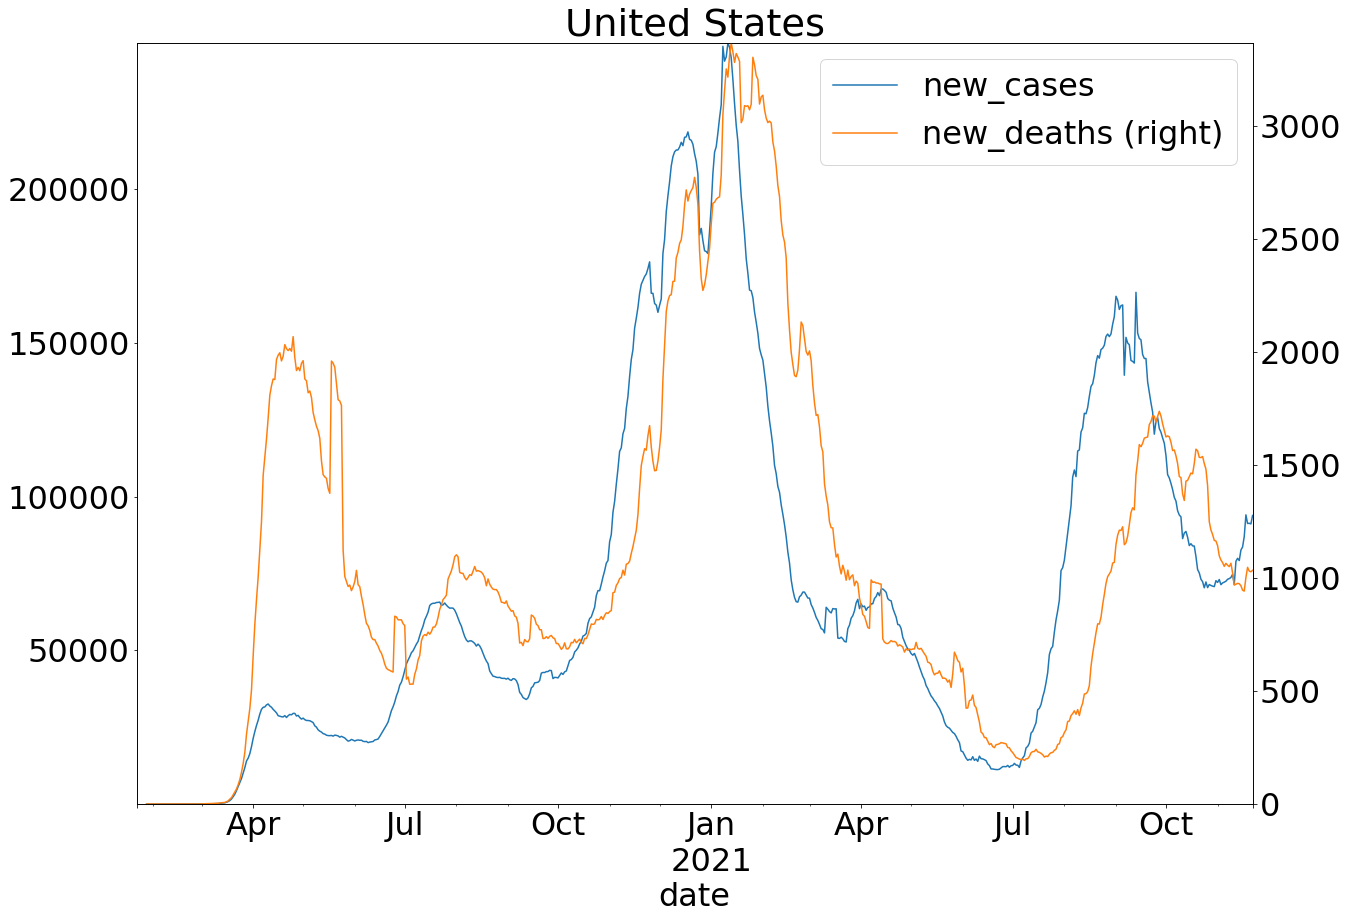

In [13]:
fig,ax = plt.subplots(figsize = (20,14))
covid_data.groupby("date").sum().loc[:,["new_cases", "new_deaths"]].rolling(7).mean().plot.line(
    secondary_y = "new_deaths", ax = ax)
ax.set_title("United States")

In [14]:
def create_merged_geo_dataframe(data, map_data, dates):
    data_frame_initialized = False
    
    counties = data.groupby("fips_code").mean().index
    for date in dates:
        agg_df = map_data[map_data.index.isin(counties)]
        agg_df["date"] = date
        if data_frame_initialized == False:
            matching_gpd = geopandas.GeoDataFrame(agg_df, 
                                                 crs = map_data.crs)
            data_frame_initialized = True
        else:
            matching_gpd = matching_gpd.append(
                agg_df,
                ignore_index = False)
    
    matching_gpd.reset_index(inplace = True)
    matching_gpd.set_index(["fips_code", "date"], inplace = True)
    matching_gpd.drop("state", axis = 1, inplace = True)
    
    matching_gpd = pd.concat([matching_gpd, data], axis = 1)
    
    return matching_gpd

In [15]:
dates = sorted(list(set(covid_data.index.get_level_values("date"))))
covid_data = create_merged_geo_dataframe(covid_data, map_data, dates)

In [16]:
covid_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID     NAME  \
fips_code date                                                              
1001      2020-01-22      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-23      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-24      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-25      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-26      1.0      001  00161526  0500000US01001  Autauga   
...                       ...      ...       ...             ...      ...   
56045     2021-11-18     56.0      045  01605086  0500000US56045   Weston   
          2021-11-19     56.0      045  01605086  0500000US56045   Weston   
          2021-11-20     56.0      045  01605086  0500000US56045   Weston   
          2021-11-21     56.0      045  01605086  0500000US56045   Weston   
          2021-11-22     56.0      045  01605086  0500000US56045   Weston   

                     LSAD         ALAND      AWATER  Population  \
fips_code date                                                    
1001      2020-01-22   06  1.539602e+09  25706961.0     55869.0   
          2020-01-23   06  1.539602e+09  25706961.0     55869.0   
          2020-01-24   06  1.539602e+09  25706961.0     55869.0   
          2020-01-25   06  1.539602e+09  25706961.0     55869.0   
          2020-01-26   06  1.539602e+09  25706961.0     55869.0   
...                   ...           ...         ...         ...   
56045     2021-11-18   06  6.210804e+09   5225499.0      6927.0   
          2021-11-19   06  6.210804e+09   5225499.0      6927.0   
          2021-11-20   06  6.210804e+09   5225499.0      6927.0   
          2021-11-21   06  6.210804e+09   5225499.0      6927.0   
          2021-11-22   06  6.210804e+09   5225499.0      6927.0   

                                                               geometry  ...  \
fips_code date                                                           ...   
1001      2020-01-22  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-23  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-24  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-25  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-26  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
...                                                                 ...  ...   
56045     2021-11-18  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-19  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-20  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-21  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-22  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   

                      cumulative_deaths cumulative_deaths_per_100_000  \
fips_code date                                                          
1001      2020-01-22                  0                           0.0   
          2020-01-23                  0                           0.0   
          2020-01-24                  0                           0.0   
          2020-01-25                  0                           0.0   
          2020-01-26                  0                           0.0   
...                                 ...                           ...   
56045     2021-11-18                 13                         183.1   
          2021-11-19                 13                         183.1   
          2021-11-20                 13                         183.1   
          2021-11-21                 13                         183.1   
          2021-11-22                 13                         183.1   

                     new_cases new_deaths  new_cases_per_100_000  \
fips_code date                                                     
1001      2020-01-22 

In [17]:
def create_new_vars(covid_data):
    for key in ["cases", "deaths"]:
        cap_key = key.title()
        covid_data.rename(columns = {"cumulative_" + key : "Total " + cap_key,
                                     "new_"+key: "Daily " + cap_key,
                                     "new_" + key + "_7_day_rolling_avg":"Daily " + cap_key + " 7 Day MA"},
                         inplace = True)

        covid_data[cap_key + " per Million"] = covid_data[
            "Total " + cap_key].fillna(0)\
            .div(covid_data["total_population"]).mul(10 ** 6)
        
        # taking the rolling average; choice of number of days is passed as moving_average_days
        covid_data["Daily " + cap_key + " per Million 7 Day MA"] = \
            covid_data["Daily " + cap_key + " 7 Day MA"]\
            .div(covid_data["total_population"]).mul(10 ** 6)
        

create_new_vars(covid_data)

In [18]:
covid_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID     NAME  \
fips_code date                                                              
1001      2020-01-22      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-23      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-24      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-25      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-26      1.0      001  00161526  0500000US01001  Autauga   
...                       ...      ...       ...             ...      ...   
56045     2021-11-18     56.0      045  01605086  0500000US56045   Weston   
          2021-11-19     56.0      045  01605086  0500000US56045   Weston   
          2021-11-20     56.0      045  01605086  0500000US56045   Weston   
          2021-11-21     56.0      045  01605086  0500000US56045   Weston   
          2021-11-22     56.0      045  01605086  0500000US56045   Weston   

                     LSAD         ALAND      AWATER  Population  \
fips_code date                                                    
1001      2020-01-22   06  1.539602e+09  25706961.0     55869.0   
          2020-01-23   06  1.539602e+09  25706961.0     55869.0   
          2020-01-24   06  1.539602e+09  25706961.0     55869.0   
          2020-01-25   06  1.539602e+09  25706961.0     55869.0   
          2020-01-26   06  1.539602e+09  25706961.0     55869.0   
...                   ...           ...         ...         ...   
56045     2021-11-18   06  6.210804e+09   5225499.0      6927.0   
          2021-11-19   06  6.210804e+09   5225499.0      6927.0   
          2021-11-20   06  6.210804e+09   5225499.0      6927.0   
          2021-11-21   06  6.210804e+09   5225499.0      6927.0   
          2021-11-22   06  6.210804e+09   5225499.0      6927.0   

                                                               geometry  ...  \
fips_code date                                                           ...   
1001      2020-01-22  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-23  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-24  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-25  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-26  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
...                                                                 ...  ...   
56045     2021-11-18  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-19  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-20  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-21  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-22  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   

                      new_cases_per_100_000 new_deaths_per_100_000  \
fips_code date                                                       
1001      2020-01-22                    NaN                    NaN   
          2020-01-23                   0.00                    0.0   
          2020-01-24                   0.00                    0.0   
          2020-01-25                   0.00                    0.0   
          2020-01-26                   0.00                    0.0   
...                                     ...                    ...   
56045     2021-11-18                  14.08                    0.0   
          2021-11-19                  14.08                    0.0   
          2021-11-20                   0.00                    0.0   
          2021-11-21                   0.00                    0.0   
          2021-11-22                  14.08                    0.0   

                     Daily Cases 7 Day MA Daily Deaths 7 Day MA  state_abr  \
fips_code date                                                               
1001      2020-01-22                  Na

Text(0.5, 1.0, 'Daily Deaths per Million 7 Day MA')

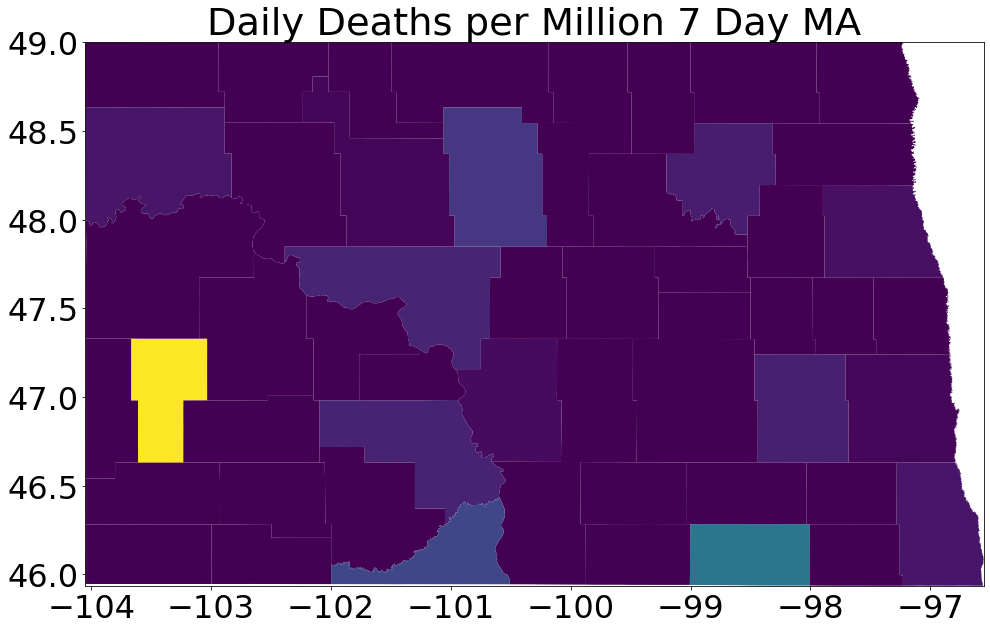

In [19]:
# selected data by state
nd_data = covid_data[covid_data["state"] == "North Dakota"]

# select data by date
nd_data = nd_data[nd_data.index.get_level_values("date") == "2021-11-15"]

# then plot
fig, ax = plt.subplots(figsize = (20,10))
key = "Daily Deaths per Million 7 Day MA"
nd_data.plot(column = key, ax = ax)#, cmap = "Reds")
ax.set_title(key)

In [20]:
start_date = "01-01-2021"     
end_date = dates[-1]

In [21]:
def select_data_within_bounds(data, minx, miny, maxx, maxy):
    data = data[data.bounds["maxx"] <= maxx]
    data = data[data.bounds["maxy"] <= maxy]
    data = data[data.bounds["minx"] >= minx]
    data = data[data.bounds["miny"] >= miny]
    
    return data


date = dates[-1]

if "map_bounded" not in locals():
    minx = covid_data[covid_data.index.get_level_values("date")== date].bounds["minx"].min()
    miny = covid_data[covid_data.index.get_level_values("date")== date].bounds["miny"].min()
    maxx = -58
    maxy = covid_data[covid_data.index.get_level_values("date")== date].bounds["maxy"].max()
    # find counties using only 1 date, only performs operation once instead of 
    # several hundred times
    bounded_data =  select_data_within_bounds(covid_data[covid_data.index.get_level_values("date")== date], minx, miny, maxx, maxy)
    counties = bounded_data.groupby("fips_code").mean().index
    covid_map_data =covid_data[covid_data.index.get_level_values("fips_code").isin(counties)]
    map_bounded = True  

In [22]:
covid_map_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID     NAME  \
fips_code date                                                              
1001      2020-01-22      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-23      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-24      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-25      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-26      1.0      001  00161526  0500000US01001  Autauga   
...                       ...      ...       ...             ...      ...   
56045     2021-11-18     56.0      045  01605086  0500000US56045   Weston   
          2021-11-19     56.0      045  01605086  0500000US56045   Weston   
          2021-11-20     56.0      045  01605086  0500000US56045   Weston   
          2021-11-21     56.0      045  01605086  0500000US56045   Weston   
          2021-11-22     56.0      045  01605086  0500000US56045   Weston   

                     LSAD         ALAND      AWATER  Population  \
fips_code date                                                    
1001      2020-01-22   06  1.539602e+09  25706961.0     55869.0   
          2020-01-23   06  1.539602e+09  25706961.0     55869.0   
          2020-01-24   06  1.539602e+09  25706961.0     55869.0   
          2020-01-25   06  1.539602e+09  25706961.0     55869.0   
          2020-01-26   06  1.539602e+09  25706961.0     55869.0   
...                   ...           ...         ...         ...   
56045     2021-11-18   06  6.210804e+09   5225499.0      6927.0   
          2021-11-19   06  6.210804e+09   5225499.0      6927.0   
          2021-11-20   06  6.210804e+09   5225499.0      6927.0   
          2021-11-21   06  6.210804e+09   5225499.0      6927.0   
          2021-11-22   06  6.210804e+09   5225499.0      6927.0   

                                                               geometry  ...  \
fips_code date                                                           ...   
1001      2020-01-22  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-23  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-24  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-25  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-26  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
...                                                                 ...  ...   
56045     2021-11-18  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-19  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-20  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-21  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-22  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   

                      new_cases_per_100_000 new_deaths_per_100_000  \
fips_code date                                                       
1001      2020-01-22                    NaN                    NaN   
          2020-01-23                   0.00                    0.0   
          2020-01-24                   0.00                    0.0   
          2020-01-25                   0.00                    0.0   
          2020-01-26                   0.00                    0.0   
...                                     ...                    ...   
56045     2021-11-18                  14.08                    0.0   
          2021-11-19                  14.08                    0.0   
          2021-11-20                   0.00                    0.0   
          2021-11-21                   0.00                    0.0   
          2021-11-22                  14.08                    0.0   

                     Daily Cases 7 Day MA Daily Deaths 7 Day MA  state_abr  \
fips_code date                                                               
1001      2020-01-22                  Na

In [23]:
covid_map_data.fillna(0, inplace = True)

/Users/kodjobarnor/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Text(0.5, 1.0, '2021-11-22\nDeaths per Million')

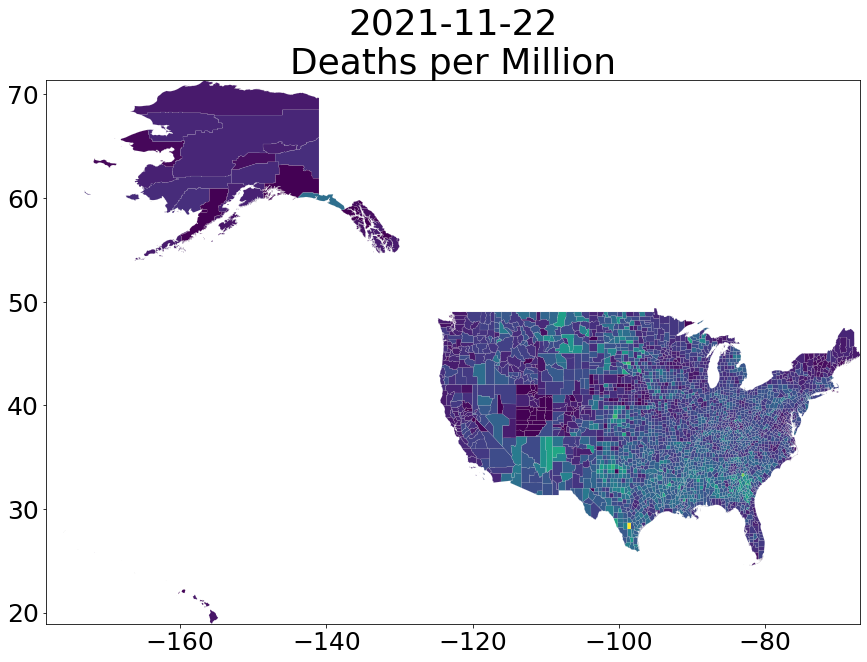

In [47]:
fig, ax = plt.subplots(figsize = (20,10))
plt.rcParams.update({"font.size": 30})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "Deaths per Million"
df = covid_map_data[covid_map_data.index.get_level_values("date")==date]
df.plot(ax = ax, column = key, linewidth = .1,
       edgecolor = "lightgrey")
ax.set_title(str(date)[:10]+ "\n" + key)

# Using inset_axes to add Alaska and Hawaii in their own subwindows

TypeError: '<=' not supported between instances of 'list' and 'int'

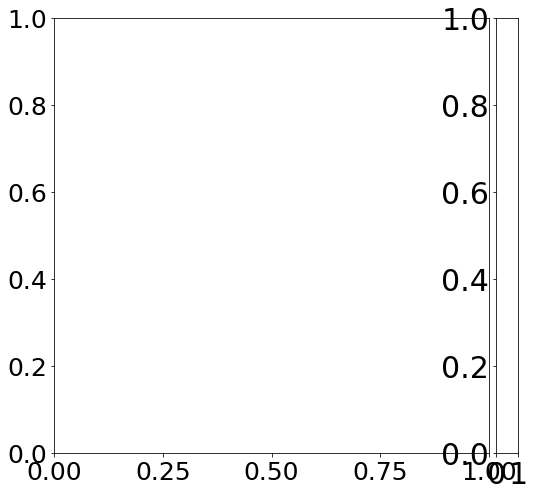

In [48]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes

fig, ax = plt.subplots(figsize = (18, 8),
                      subplot_kw = {"aspect": "equal"})
plt.rcParams.update({"font.size":30})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "Deaths per Million"
map_data = covid_map_data[
    covid_map_data.index.get_level_values("date") == date]
df = map_data[~map_data["state"].str.contains("Alaska|Hawaii")]

#setting up the color scheme with cmap and norm
cmap = cm.get_cmap("Reds", 10)
vmin = 1
vmax = df[key].max()
norm = cm.colors.LogNorm(vmin=vmin, vmax=vmax)
sm = cm.ScalarMappable(cmap = cmap, norm = norm)

#plt.cm.ScalarMappable(cmap=cmap, norm=norm)

sm._A = []
divider = make_axes_locatable(ax)
size = "5%" 
cax = divider.append_axes("right", size = size, pad = 0.1)
cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
cbar.ax.tick_params(labelsize=18)
vals = list(cbar.ax.get_yticks())
vals.append(vmax)
cbar.ax.set_yticklabels([int(x) for x in vals])
cbar.ax.set_ylabel(key, fontsize = 20)


df.plot(ax = ax, column=key, vmin = vmin, vmax=vmax,
      cmap = cmap, legend =False, linewidth = .5, edgecolor = "lightgrey",
      norm = norm)

ax.set_title(str(date)[:10]+"\nCOVID-19 in the U.S.",
            fontsize = 30)

axins = {}
axins["Alaska"] = inset_axes(ax, width = "17%", height = "35%",
                            loc = "lower left")

axins["Hawaii"] = inset_axes(ax, width = "50%", height = "40%",
                            loc = "lower left")

for state in axins.keys():
    axins[state].set_xticks([])
    axins[state].set_yticks([])
    axins[state].axis("off")
    map_data[map_data["state"].str.contains(state)].plot(
    ax = axins[state], cax = ax, cmap = cmap, norm =norm)
    
axins["Hawaii"].set_xlim(-161, -154)
axins["Alaska"].set_ylim(53, 74)

In [52]:
import pandas as pd
u_data = pd.read_csv("countyUnemploymentData.csv", encoding = "latin1", 
    parse_dates = True, index_col="date")
u_data.reset_index(inplace = True)
index = u_data["fips_code"].dropna(axis = 0).index
u_data = u_data.loc[index]
u_data["fips_code"] = u_data["fips_code"].astype(int)
u_data.set_index(["fips_code", "date"], inplace = True)
u_data

state_fips  county_fips                Location  \
fips_code date                                                          
1001      2019-08-01           1            1       Autauga County AL   
1003      2019-08-01           1            3       Baldwin County AL   
1005      2019-08-01           1            5       Barbour County AL   
1007      2019-08-01           1            7          Bibb County AL   
1009      2019-08-01           1            9        Blount County AL   
...                          ...          ...                     ...   
72145     2021-06-01          72          145  Vega Baja Municipio PR   
72147     2021-06-01          72          147    Vieques Municipio PR   
72149     2021-06-01          72          149   Villalba Municipio PR   
72151     2021-06-01          72          151    Yabucoa Municipio PR   
72153     2021-06-01          72          153      Yauco Municipio PR   

                     Labor Force Employed Unemployed Unemployment Rate  
fips_code date                                                          
1001      2019-08-01      26,079   25,368        711               2.7  
1003      2019-08-01      97,939   95,367      2,572               2.6  
1005      2019-08-01       8,652    8,322        330               3.8  
1007      2019-08-01       8,670    8,403        267               3.1  
1009      2019-08-01      25,309   24,641        668               2.6  
...                          ...      ...        ...               ...  
72145     2021-06-01      12,993   11,580      1,413              10.9  
72147     2021-06-01       2,610    2,288        322              12.3  
72149     2021-06-01       6,940    6,152        788              11.4  
72151     2021-06-01       8,352    7,480        872              10.4  
72153     2021-06-01       9,212    8,127      1,085              10.4  

[74037 rows x 7 columns]

In [53]:
map_data = map_data.reset_index().set_index("fips_code")
map_data.drop("date", axis = 1, inplace = True)
map_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID        NAME LSAD  \
fips_code                                                                
1001           1.0      001  00161526  0500000US01001     Autauga   06   
1003           1.0      003  00161527  0500000US01003     Baldwin   06   
1005           1.0      005  00161528  0500000US01005     Barbour   06   
1007           1.0      007  00161529  0500000US01007        Bibb   06   
1009           1.0      009  00161530  0500000US01009      Blount   06   
...            ...      ...       ...             ...         ...  ...   
56037         56.0      037  01609192  0500000US56037  Sweetwater   06   
56039         56.0      039  01605083  0500000US56039       Teton   06   
56041         56.0      041  01605084  0500000US56041       Uinta   06   
56043         56.0      043  01605085  0500000US56043    Washakie   06   
56045         56.0      045  01605086  0500000US56045      Weston   06   

                  ALAND        AWATER  Population  \
fips_code                                           
1001       1.539602e+09  2.570696e+07     55869.0   
1003       4.117547e+09  1.133056e+09    223234.0   
1005       2.292145e+09  5.053870e+07     24686.0   
1007       1.612167e+09  9.602089e+06     22394.0   
1009       1.670104e+09  1.501542e+07     57826.0   
...                 ...           ...         ...   
56037      2.700575e+10  1.662303e+08     42343.0   
56039      1.035178e+10  5.708649e+08     23464.0   
56041      5.391632e+09  1.662582e+07     20226.0   
56043      5.798139e+09  1.042960e+07      7805.0   
56045      6.210804e+09  5.225499e+06      6927.0   

                                                    geometry  ...  \
fips_code                                                     ...   
1001       POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
1003       POLYGON ((-88.02858 30.22676, -88.02399 30.230...  ...   
1005       POLYGON ((-85.74803 31.61918, -85.74544 31.618...  ...   
1007       POLYGON ((-87.42194 33.00338, -87.31854 33.006...  ...   
1009       POLYGON ((-86.96336 33.85822, -86.95967 33.857...  ...   
...                                                      ...  ...   
56037      POLYGON ((-110.05438 42.01103, -110.05436 42.0...  ...   
56039      POLYGON ((-111.05361 44.66627, -110.75076 44.6...  ...   
56041      POLYGON ((-111.04662 41.15604, -111.04659 41.2...  ...   
56043      POLYGON ((-108.55056 44.16845, -108.50652 44.1...  ...   
56045      POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   

           new_cases_per_100_000 new_deaths_per_100_000 Daily Cases 7 Day MA  \
fips_code                                                                      
1001                       10.87                    0.0                10.00   
1003                        6.73                    0.0                17.86   
1005                        3.88                    0.0                 5.71   
1007                        0.00                    0.0                 2.86   
1009                        6.94                    0.0                14.86   
...                          ...                    ...                  ...   
56037                      95.20                    0.0                14.57   
56039                      52.04                    0.0                 7.57   
56041                       4.85                    0.0                 5.86   
56043                      98.41                    0.0                 2.17   
56045                      14.08                    0.0                 1.43   

          Daily Deaths 7 Day MA  state_abr        Location  Cases per Million  \
fips_code                                                                       
1001                       0.29         AL     Autauga, AL      189800.724638   
1003                       1.00         AL     Baldwin, AL      182598.374874   
1005                       0.14         AL     Barbour, AL      143045.535645   
1007          

In [54]:
dates = u_data.groupby("date").mean().index
dates

DatetimeIndex(['2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [55]:
u_data = create_merged_geo_dataframe(u_data, map_data, dates)

/Users/kodjobarnor/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [56]:
u_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID     NAME  \
fips_code date                                                              
1001      2019-08-01      1.0      001  00161526  0500000US01001  Autauga   
          2019-09-01      1.0      001  00161526  0500000US01001  Autauga   
          2019-10-01      1.0      001  00161526  0500000US01001  Autauga   
          2019-11-01      1.0      001  00161526  0500000US01001  Autauga   
          2019-12-01      1.0      001  00161526  0500000US01001  Autauga   
...                       ...      ...       ...             ...      ...   
72153     2021-02-01      NaN      NaN       NaN             NaN      NaN   
          2021-03-01      NaN      NaN       NaN             NaN      NaN   
          2021-04-01      NaN      NaN       NaN             NaN      NaN   
          2021-05-01      NaN      NaN       NaN             NaN      NaN   
          2021-06-01      NaN      NaN       NaN             NaN      NaN   

                     LSAD         ALAND      AWATER  Population  \
fips_code date                                                    
1001      2019-08-01   06  1.539602e+09  25706961.0     55869.0   
          2019-09-01   06  1.539602e+09  25706961.0     55869.0   
          2019-10-01   06  1.539602e+09  25706961.0     55869.0   
          2019-11-01   06  1.539602e+09  25706961.0     55869.0   
          2019-12-01   06  1.539602e+09  25706961.0     55869.0   
...                   ...           ...         ...         ...   
72153     2021-02-01  NaN           NaN         NaN         NaN   
          2021-03-01  NaN           NaN         NaN         NaN   
          2021-04-01  NaN           NaN         NaN         NaN   
          2021-05-01  NaN           NaN         NaN         NaN   
          2021-06-01  NaN           NaN         NaN         NaN   

                                                               geometry  ...  \
fips_code date                                                           ...   
1001      2019-08-01  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2019-09-01  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2019-10-01  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2019-11-01  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2019-12-01  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
...                                                                 ...  ...   
72153     2021-02-01                                               None  ...   
          2021-03-01                                               None  ...   
          2021-04-01                                               None  ...   
          2021-05-01                                               None  ...   
          2021-06-01                                               None  ...   

                      Daily Cases per Million 7 Day MA Deaths per Million  \
fips_code date                                                              
1001      2019-08-01                         181.15942        2826.086957   
          2019-09-01                         181.15942        2826.086957   
          2019-10-01                         181.15942        2826.086957   
          2019-11-01                         181.15942        2826.086957   
          2019-12-01                         181.15942        2826.086957   
...                                                ...                ...   
72153     2021-02-01                               NaN                NaN   
          2021-03-01                               NaN                NaN   
          2021-04-01                               NaN                NaN   
          2021-05-01                               NaN                NaN   
          2021-06-01                               NaN                NaN   

                     Daily Deaths per Million 7 Day MA  state_fips  \
fips_code date                     

In [57]:
minx = -127
miny = 23
maxx = -66
maxy = 50

u_data = select_data_within_bounds(u_data, minx, miny, maxx, maxy)
u_map_bounded = True

In [58]:
counties = u_data.groupby("fips_code").mean().index

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


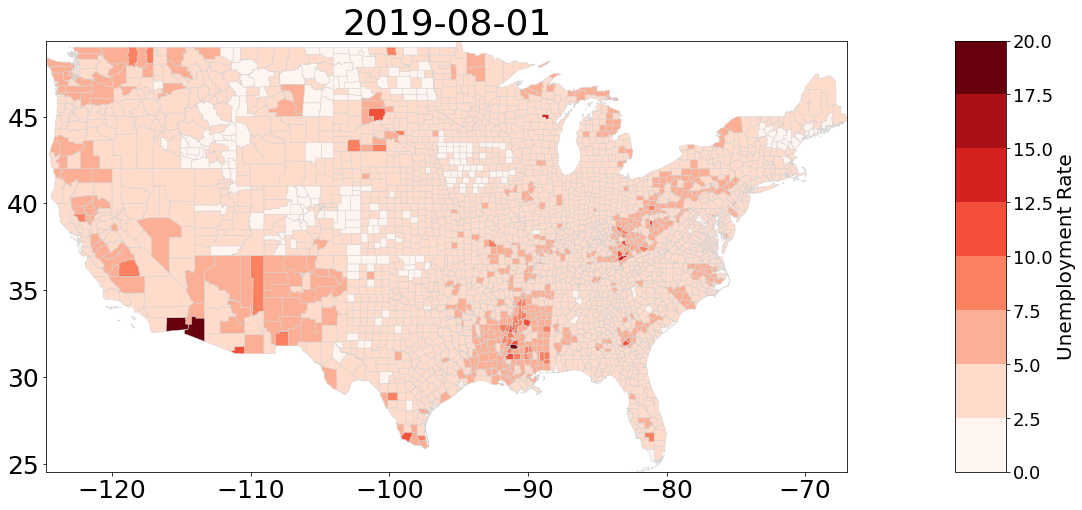

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


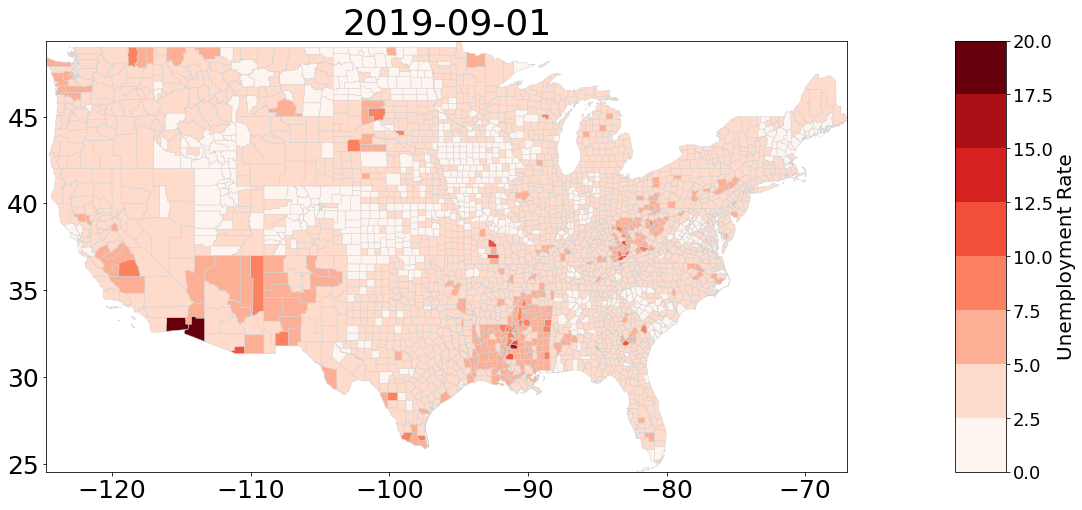

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


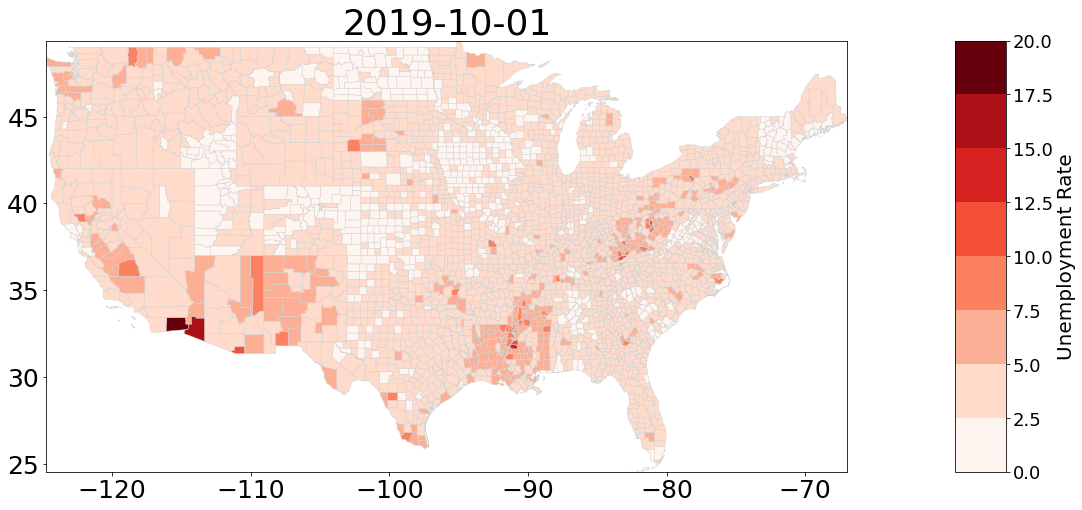

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


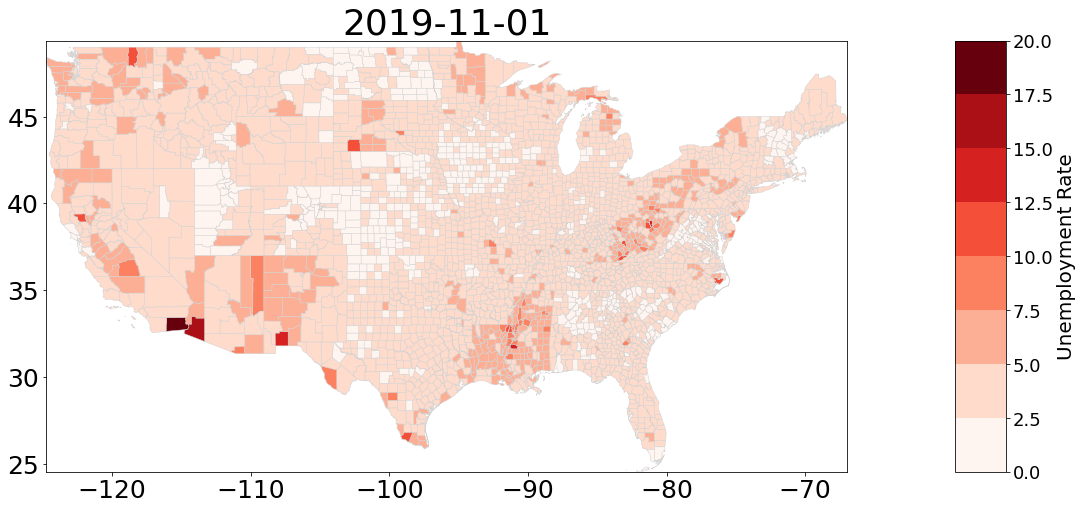

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


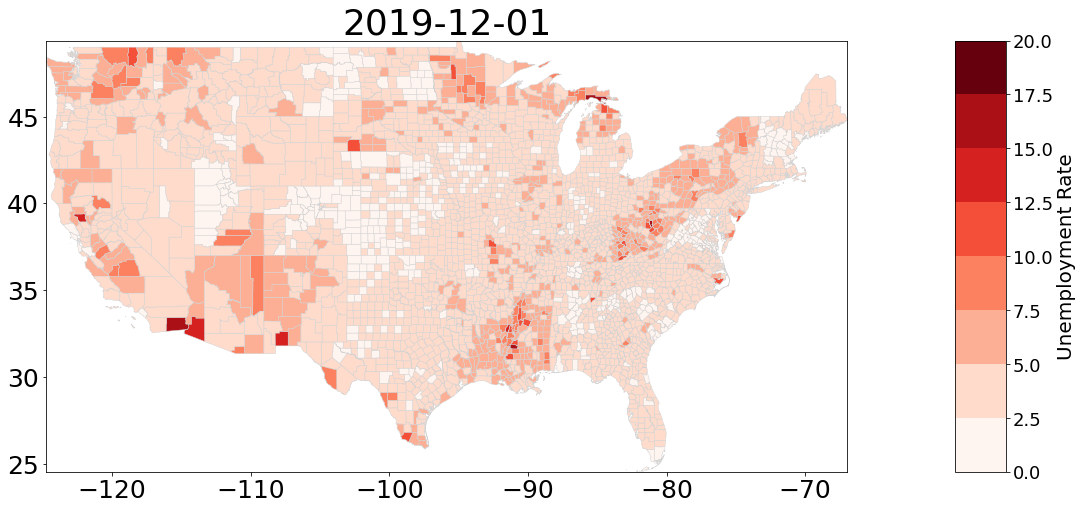

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


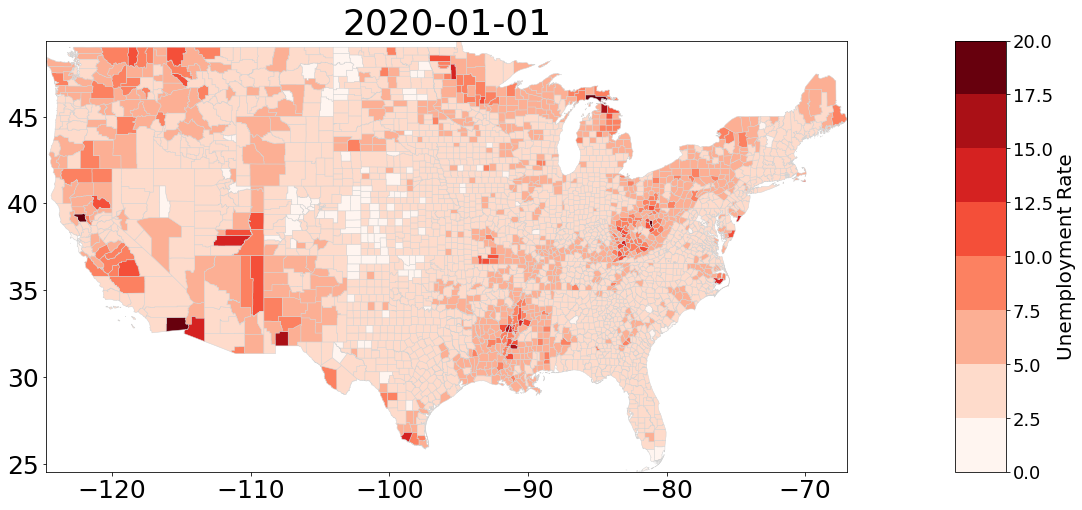

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


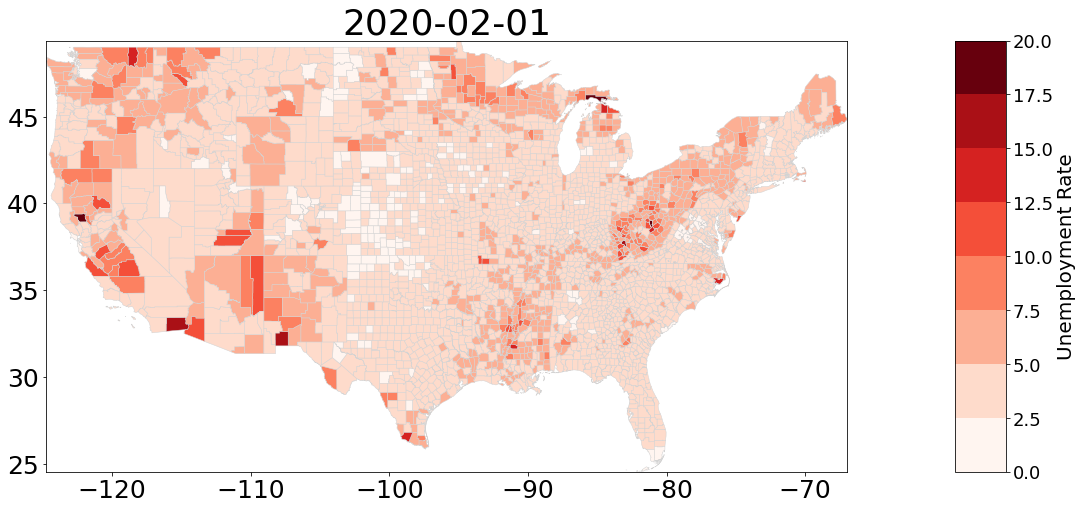

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


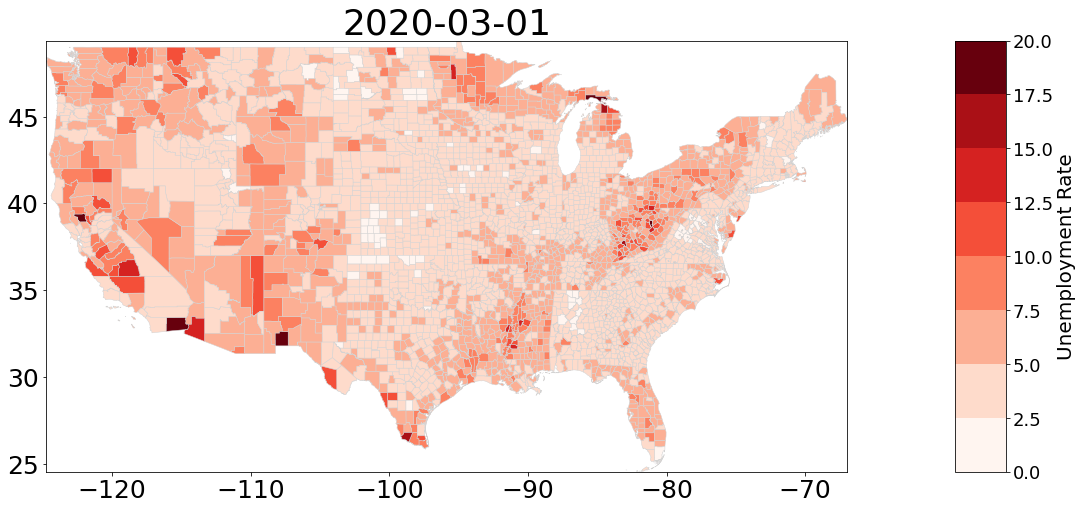

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


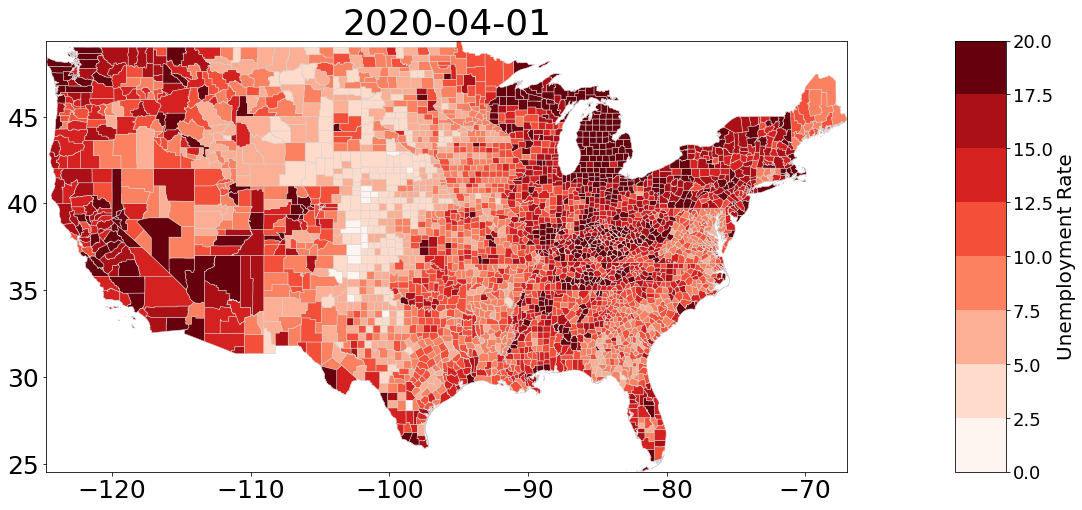

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


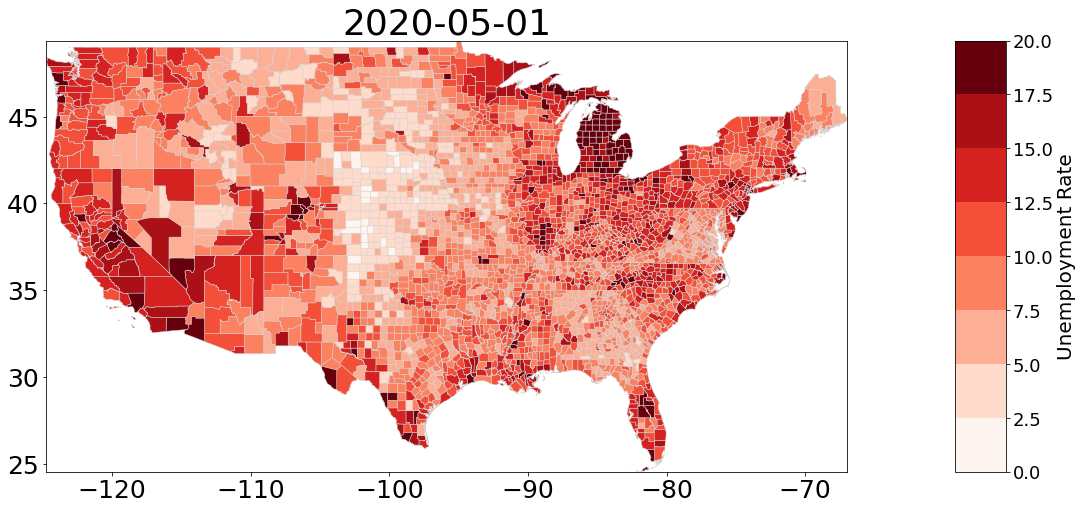

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


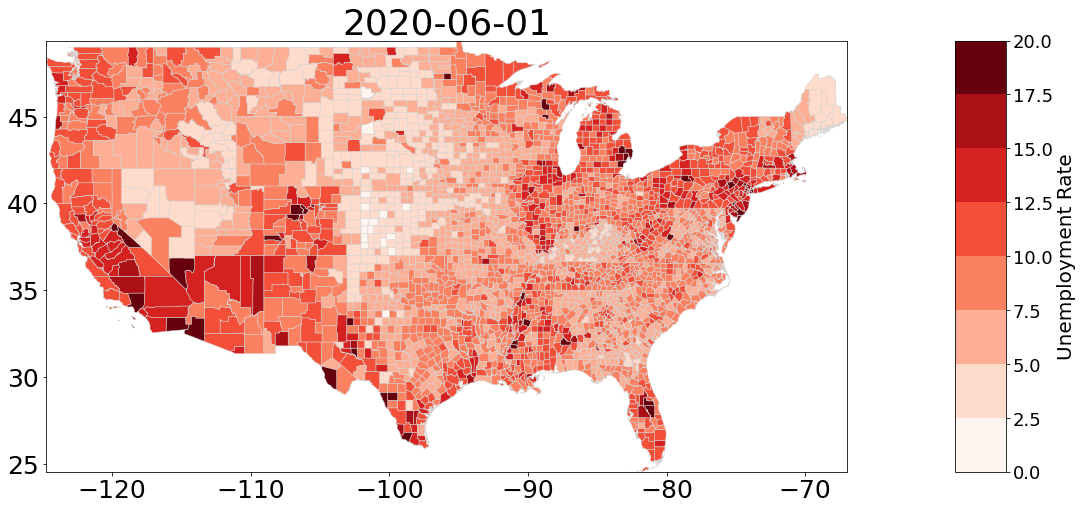

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


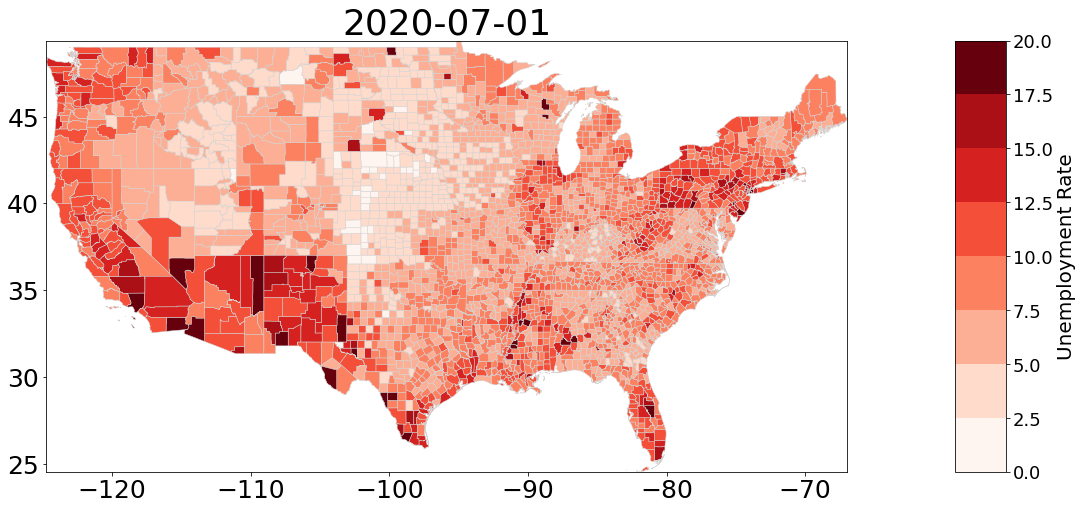

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


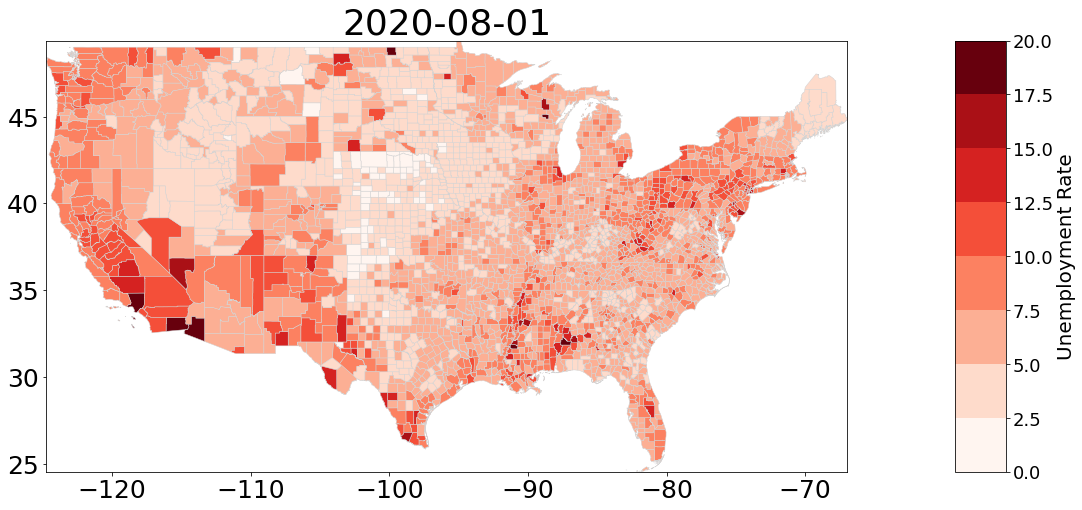

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


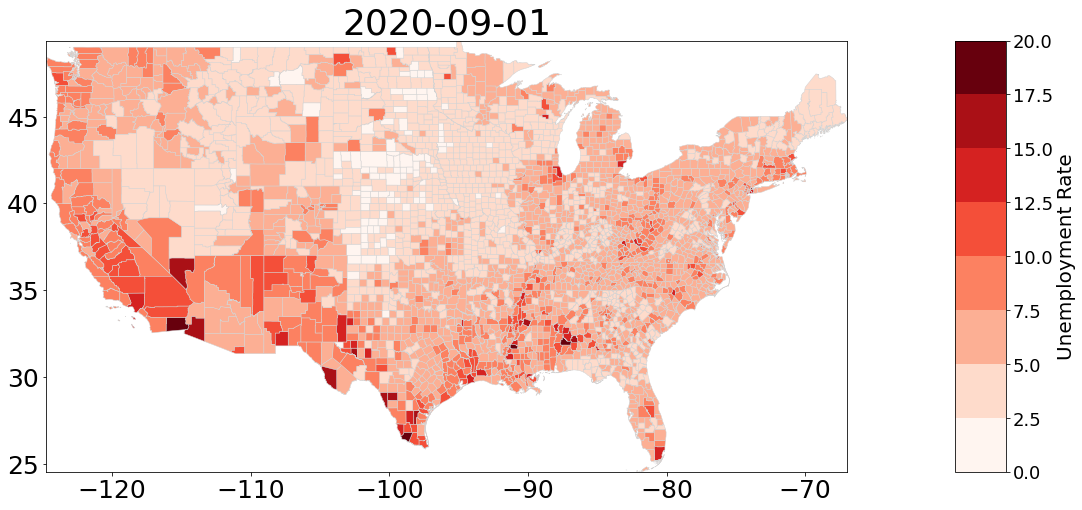

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


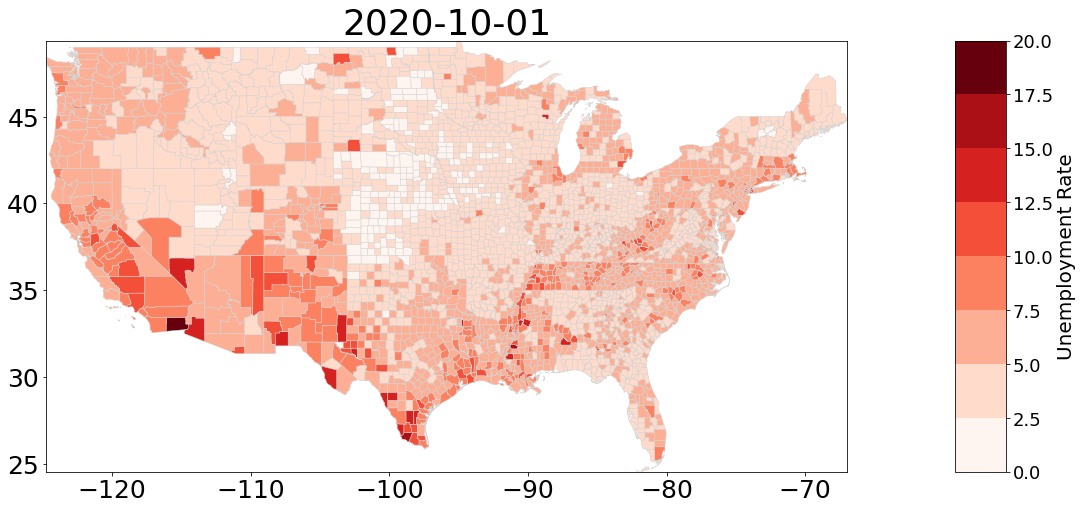

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


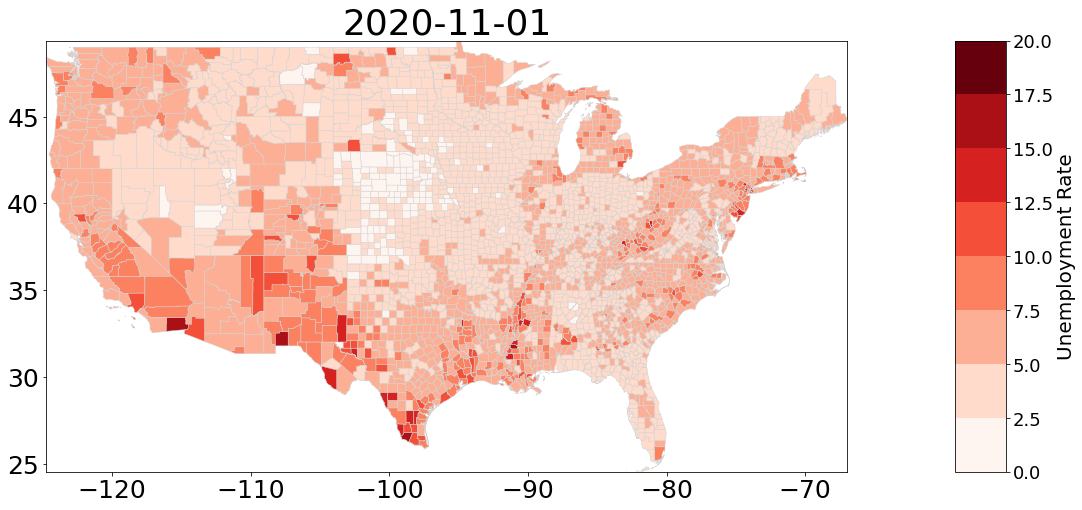

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


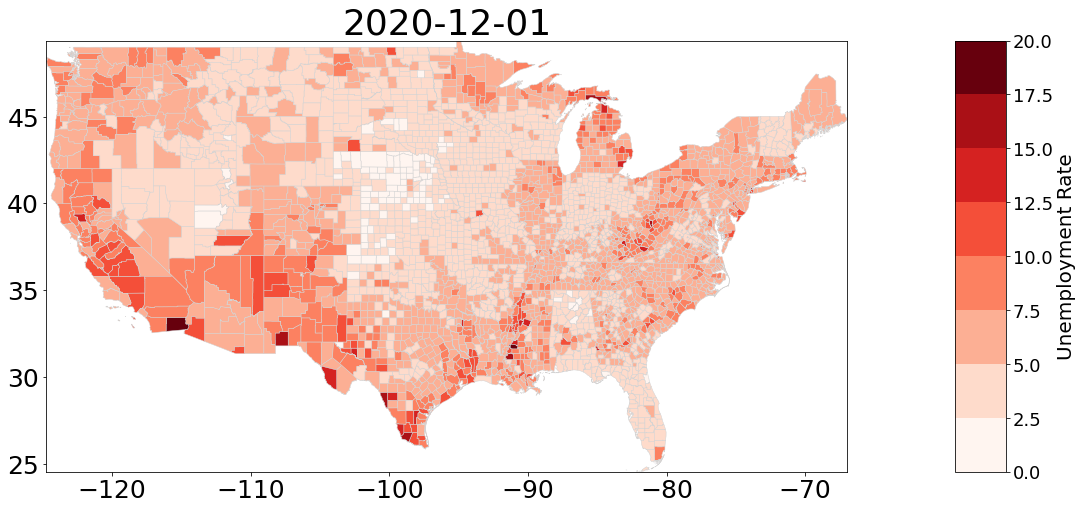

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


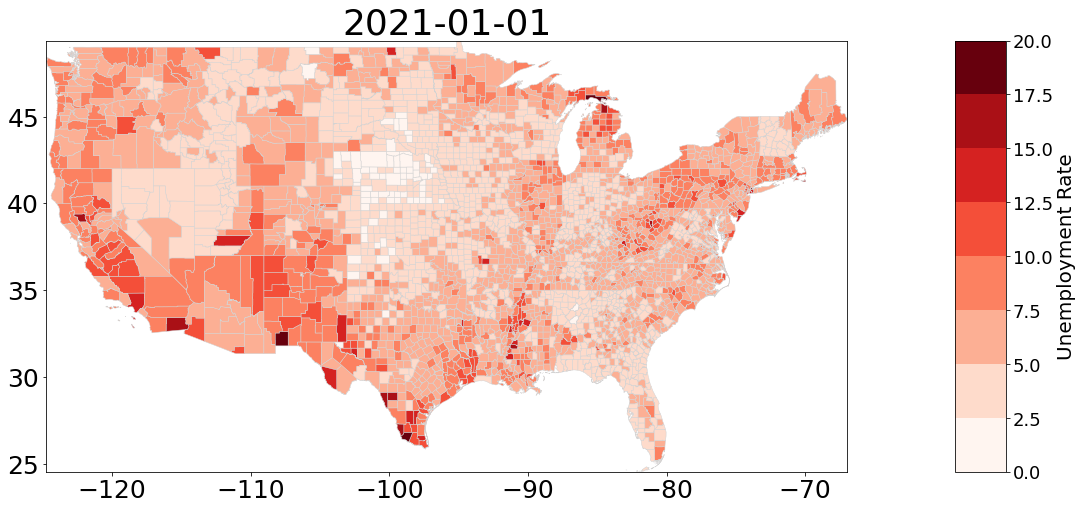

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


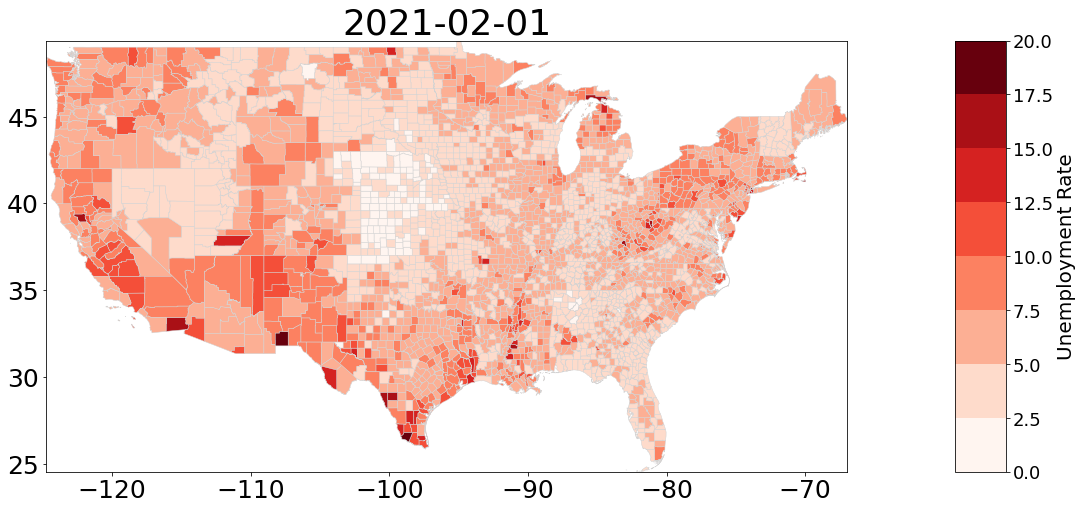

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


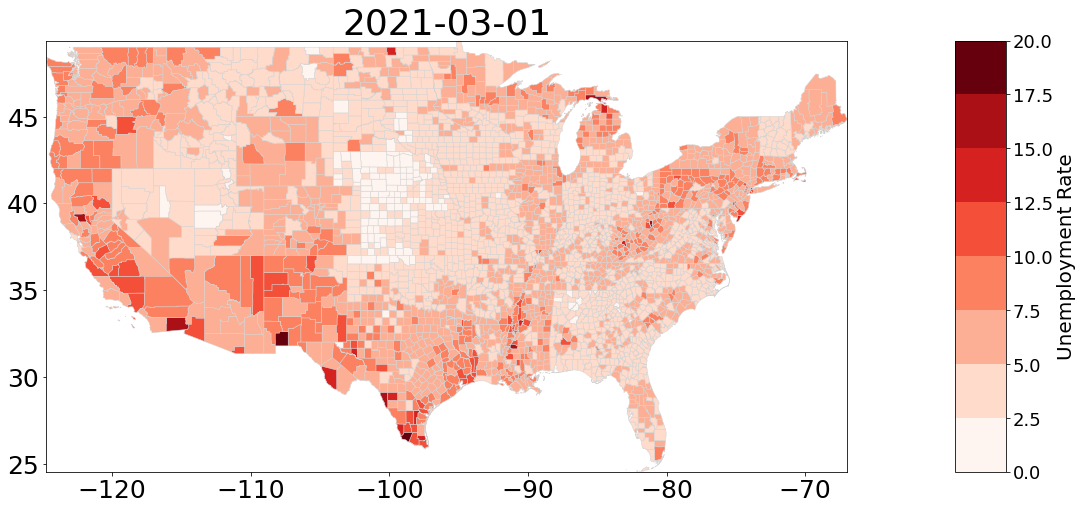

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


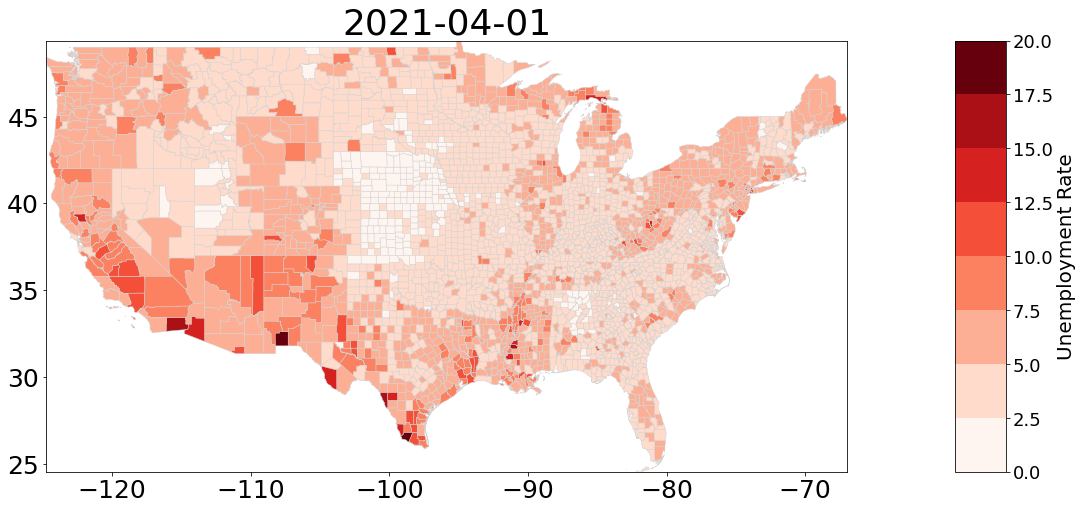

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


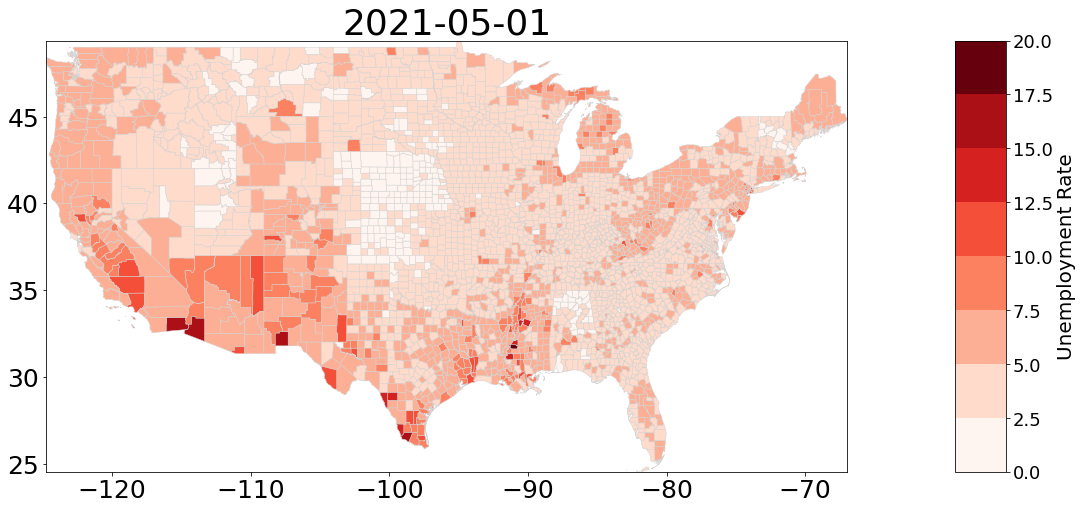

<ipython-input-59-d491bc76b275>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
<ipython-input-59-d491bc76b275>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


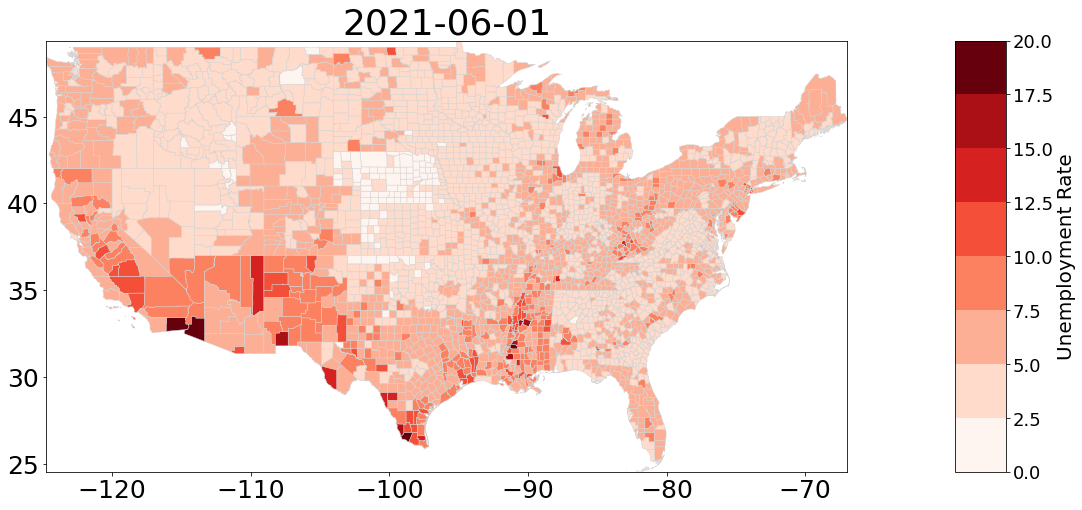

In [59]:
key = "Unemployment Rate"
u_data[key] = u_data[key].astype(float)

for date in dates:
    fig, ax = plt.subplots(figsize=(19,9),
                          subplot_kw = {"aspect":"equal"})
    plt.rcParams.update({"font.size": 30})

    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)

    vmin = 0
    vmax = 20
    cmap = cm.get_cmap("Reds", 8)
    norm = cm.colors.Normalize(vmin=vmin, vmax=vmax)

    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    
    sm.A = []
    
    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right", size = size, pad = .1)
    
    cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
    cbar.ax.tick_params(labelsize=18)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)
    cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])
    cbar.ax.set_ylabel(key, fontsize=20)

    df = u_data[u_data.index.get_level_values("date") == date]#.dropna(axis=0)
    df.plot(ax=ax, cax=ax, column = key,
            vmin=vmin, vmax=vmax,
            cmap=cmap, legend=False, 
            linewidth = .5, edgecolor="lightgrey",norm=norm)
    ax.set_title(str(date)[:10])
    plt.show()
    
    plt.close()

In [64]:
import warnings
warnings.filterwarnings("ignore")
key = "Unemployment Rate"
new_key = "Normalized " + key + " (Feb 2020)"
n_u_data = u_data.copy()
n_u_data[new_key] =  0.
n_u_data = n_u_data.reset_index().set_index(["date", "fips_code"])

#for county in counties:
 #   n_u_data[key][county] = n_u_data.loc[county, key].div(n_u_data.loc[county, 
  #                                                                     "Feb-20"][key])

for date in dates:
    n_u_data[new_key] =n_u_data[key].sub(n_u_data.loc[datetime.datetime(2020,2,1), key])